# First Order Differential Equations
_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Solving Linear Equations with integrating factors

Consider the general form of the first order linear equation:

\begin{align}
y' + p(x)y = g(x) \label{1}
\end{align}

Multiply function (\ref{1}) with a yet to be determined new function $\mu(x)$:

\begin{align}
\mu(x)y' + \mu(x)p(x)y = \mu(x)g(x) \label{2}
\end{align}

The goal is to choose $\mu(x)$ so that the left side of (\ref{2}) is the derivative of some function. After adding and subtracting $\mu'(x)y$, one get:

\begin{align}
\left(\mu'(x)y - \mu(x)y'\right) - \left(\mu'(x)- \mu(x)p(x)y \right) = \mu(x)g(x) \label{3}
\end{align}

If the second term on the left hand side were zero, then equation (\ref{3}) would have the form 

\begin{align}
\left( \mu(x)y \right)' = \mu(x)g(x) \label{4}
\end{align}

the left side of (\ref{3}) would be integratable. To achieve this, one must choose $\mu$ so that

\begin{align}
\mu'(x) -p(x)\mu(x) = 0. \label{5}
\end{align}

If we assume that $\mu$ is positive, one can write (\ref{5}) as

\begin{align}
\frac{\mu'(x)}{\mu(x)} = p(x),\label{6}
\end{align}

or

\begin{align}
\frac{d}{dx}\ln \mu(x) = p(x).\label{7}
\end{align}

Thus

\begin{align}
\ln \mu(x) = \int p(x)dx + c, \qquad \rm{where} \quad c \in 0\label{8}
\end{align}

Rewriting (\ref{8}) gives the simplest possible function for $\mu(x)$, namely

\begin{align}
\mu(x) = \exp \int p(x)dx \label{9}
\end{align}

Now going back to (\ref{1}) and multiply it by $\mu(x)$, we obtain (\ref{4}). By integrating both sites of (\ref{4}) we get

\begin{align}
\mu(x)y = \int \mu(x)g(x)dx + c\label{10}
\end{align}

or

\begin{align}
y = \frac{\int \mu(x)g(x)dx + c}{\mu(x)}\label{11}
\end{align}

Equation (\ref{11}) is the general solution of (\ref{1}).

### Example 1: Analytical solution

Consider the inital value problem:

\begin{align}
y' + \frac{1}{2}y &= \frac{3}{2} \label{e1-1} \\
y_0 &= 2
\end{align}

Multiplying (\ref{e1-1}) with $\mu(x)$ gives:

\begin{align}
\mu(x)y' + \mu(x)\frac{1}{2}y &= \mu(x)\frac{3}{2} \\ \label{e1-2}
\end{align}

Finding the integration factor:

\begin{align} 
\frac{\mu'(x)}{\mu(x)} &= \frac{1}{2} \\
\ln |\mu(x)| &= \int \frac{1}{2}dx \\
\mu(x) &= \exp \int \frac{1}{2}dx \\
       &= e^{\left( \frac{x}{2} + c \right)} \\
       &= e^{\frac{x}{2}}, \qquad c \in 0 \label{e1-3}
\end{align}

Substituting (\ref{e1-3}) in (\ref{e1-1}) gives

\begin{align}
\left( \mu(x)y \right)' &= \mu(x)\frac{3}{2} \\
\left( e^{\frac{x}{2}}y \right)' &= \frac{3}{2}e^{\frac{x}{2}}
\end{align}

\begin{align}
 e^{\frac{x}{2}}y &= \int \frac{3}{2}e^{\frac{x}{2}} dx \\
 e^{\frac{x}{2}}y &= 3e^{\frac{x}{2}} + c
\end{align} 
and finally, the generic solution:
\begin{align}                
                y &= 3 + ce^{-\frac{x}{2}}
\end{align}

Now, solving the initial value problem with $x=0$ and $y=2$:

\begin{align}                
                2 &= 3 + c  \\
               \rightarrow c &= -1
\end{align}
the initial value solution is
\begin{align}                
                y &= 3 - e^{-\frac{x}{2}}
\end{align}



### Example 1: Numerical solution

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# nr of points in the domain
n=20

# Domain of interest
ymin = -1
ymax = 4
y = np.linspace(ymin, ymax, n)

xmin = -1
xmax = 4
x = np.linspace(xmin, xmax, n)

In [4]:
# Differential equation
def dy(y, x):
    return -1/2*y + 3/2

# Initial condition: x=0, y=2
y0 = 2

In [5]:
# Solve the differential equation.

# Since the xmin is not x0, we have to split the solution in 2 parts for the solver.
x_left = np.linspace(0, xmin, n)
x_right = np.linspace(0, xmax, n)

y_sol_left = odeint(dy, y0, x_left)
y_sol_right = odeint(dy, y0, x_right)

In [6]:
# Mesh grid values
xx, yy = np.meshgrid(x, y)

# Vector length
L = np.sqrt(1 + dy(yy, xx))

# direction vectors V = [vx, vy]
vx = np.ones_like(xx)
vy = dy(yy, xx)

In [7]:
L = np.sqrt(1 + dy(yy, xx))

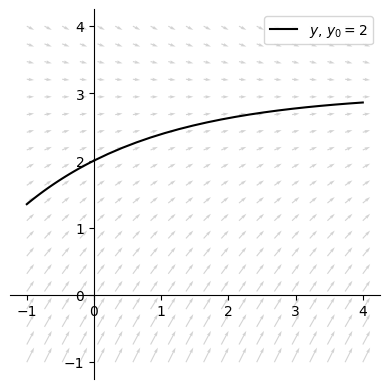

In [8]:
plt.figure()
plt.quiver(xx, yy, np.ones_like(xx), dy(yy, xx), color="lightgrey")
plt.plot(x_left, y_sol_left, color="black", label="$y$, $y_0 = 2$")
plt.plot(x_right, y_sol_right, color="black")
ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
_ = plt.legend()


Solution for $y' = -\frac{1}{2}y + \frac{3}{2}$ and $y_0 = 2$.

### Example 2: Numerical solution

Consider the initial value problem:

\begin{align}
y' &= -2y + e^{-x} \\
y_0 &= \frac{3}{4}
\end{align}

In [9]:
# nr of points in the domain
n=20

# Domain of interest
ymin = -2
ymax = 2
y = np.linspace(ymin, ymax, n)

xmin = -2
xmax = 4
x = np.linspace(xmin, xmax, n)

In [10]:
# Differential equation
def dy(y, x):
    return -2*y+np.exp(-x)

# Initial condition: x=0, y=3/4
y0 = 3/4

In [11]:
# Solve the differential equation.

# Since the xmin is not x0, we have to split the solution in 2 parts for the solver.
x_left = np.linspace(0, xmin, n)
x_right = np.linspace(0, xmax, n)

y_sol_left = odeint(dy, y0, x_left)
y_sol_right = odeint(dy, y0, x_right)

In [12]:
# Mesh grid values
xx, yy = np.meshgrid(x, y)

# Vector length
#L = np.sqrt(1 + dy(yy, xx))

# direction vectors V = [vx, vy]
vx = np.ones_like(xx)
vy = dy(yy, xx)

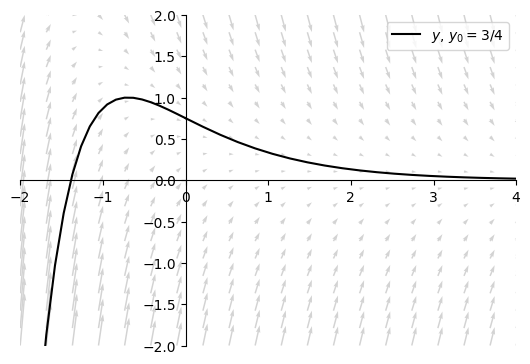

In [13]:
plt.figure()
plt.quiver(xx, yy, np.ones_like(xx), dy(yy, xx), color="lightgrey")
plt.plot(x_left, y_sol_left, color="black", label="$y$, $y_0 = 3/4$")
plt.plot(x_right, y_sol_right, color="black")
ax = plt.gca()
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_aspect("equal")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
_ = plt.legend()


Solution for $y' = -2y + e^{-x}$ and $y_0 = \frac{3}{4}$.